### MNIST Handwritten Digits Classification using a Convolutional Neural Network (CNN)
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.

In [3]:
#Importing Tensorflow
import tensorflow as tf
#Downloading Mnist dataset from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


6


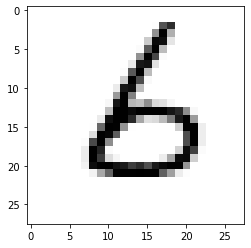

In [4]:
#To see the digit from dataset
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7577
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
#Checking the dimensions & size of training set
x_train.shape

(60000, 28, 28)

In [6]:
#Checking the dimensions & size of test set
x_test.shape

(10000, 28, 28)

In [7]:
# Reshaping the array of images to 4-dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [15]:
#Importing Keras modules to make a neural network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.25))
#Last dense layer contain 10 neurons becuase total no digits are 10 (0 to 9)
model.add(Dense(10,activation=tf.nn.softmax))

### Model Compilation using adam optimizer 

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 29s 485us/step - loss: 0.1904 - accuracy: 0.9418
Epoch 2/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.0676 - accuracy: 0.9792
Epoch 3/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.0450 - accuracy: 0.9858
Epoch 4/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.0327 - accuracy: 0.9897
Epoch 5/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.0248 - accuracy: 0.9922
Epoch 6/10
60000/60000 [==============================] - 29s 487us/step - loss: 0.0202 - accuracy: 0.9934
Epoch 7/10
60000/60000 [==============================] - 31s 514us/step - loss: 0.0192 - accuracy: 0.9940
Epoch 8/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.0166 - accuracy: 0.9946
Epoch 9/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.0126 - accuracy: 0.9962
Epoch 10/10
60000/60000 [============

In [17]:
#Model Evaluation on test dataset
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 106us/step


[0.08081328128816871, 0.9842000007629395]

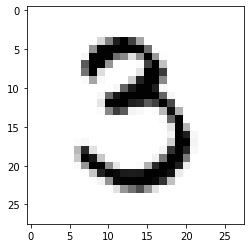

In [19]:
#Visulization of any digit from test data set
image_index = 808
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

### Checking the digit from test set

In [20]:
img_rows,img_cols=(28,28)
pred = model.predict(x_test[image_index].reshape(1,img_rows,img_cols,1))
print(pred.argmax())

3
